In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


%matplotlib inline

# make plots look betters
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (8,6)
# plt.rcParams['figure.dpi'] = (300)
plt.rcParams['font.size'] = 12

comments = pd.read_csv("../toxic_comment_data/train.csv")
comments2 = pd.read_csv("../toxic_comment_data/test_with_solutions.csv")
comments2 = comments2.drop(columns=["Usage"])
comments = pd.concat([comments,comments2])
comments = comments.dropna() # drop rows with missing dates (for now anyway)

## Grid Search Example

Fit a NB classifier:

In [2]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf.fit(comments.Comment, comments.Insult);

Check accuracy:

In [3]:
test = pd.read_csv("../toxic_comment_data/impermium_verification_labels.csv")
docs_test = test.Comment
predicted = text_clf.predict(docs_test)
np.mean(predicted == test.Insult)

0.567337807606264

Plot ROC:

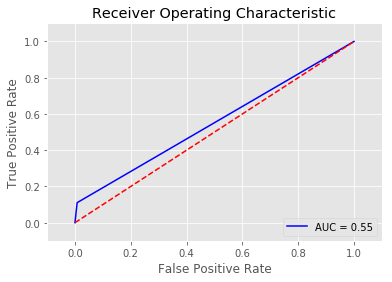

In [4]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test.Insult, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Now try doing some grid search:

In [13]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], # the range of the n-grams
              'vect__analyzer': ['word','char'], # char or word n-grams
              'vect__stop_words': [None, 'english'], # stop words or not
              'tfidf__use_idf': (True, False)} # use idf or not

# the names are important, e.g. vect__ corresponds to the name given to the class in the pipeline,
# while "ngram_range" is a parameter for the class, i.e. CountVectorizer

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1) # run the grid search on the chosen pipeline
gs_clf = gs_clf.fit(comments.Comment, comments.Insult) 

Print out the best score found, and the parameters that go with it:

In [15]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.750560538116592
{'tfidf__use_idf': True, 'vect__analyzer': 'word', 'vect__ngram_range': (1, 1), 'vect__stop_words': 'english'}


See how the new classifier does on accuracy: (slight improvement)

In [20]:
test = pd.read_csv("../toxic_comment_data/impermium_verification_labels.csv")
docs_test = test.Comment
predicted = gs_clf.predict(docs_test)
np.mean(predicted == test.Insult)

0.5879194630872483

Plot new ROC: (slight improvement)

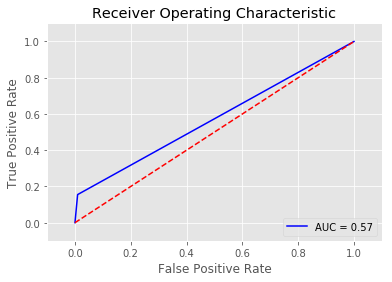

In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test.Insult, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()